In [141]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy
import math
import scipy.io.wavfile as wav
import pygame 
import keyboard
from numpy import random
from collections import deque
import sys, os
import time, random 
import wave, argparse
import scipy.signal as signal
import librosa

sr = 22050

In [2]:
def makesine(freq, dur):
    t = numpy.linspace(0, dur, math.ceil(sr*dur))
    x = numpy.sin(2 * numpy.pi * freq * t)
    return x

In [3]:
output = numpy.array(())
y = makesine(261.63, .5) # C for 0.5 seconds
output = numpy.concatenate((output, y))
y = makesine(293.66, .5) # D for 0.5 seconds
output = numpy.concatenate((output, y))
y = makesine(329.63, .5) # E for 0.5 seconds
output = numpy.concatenate((output, y))
ipd.Audio(output, rate=sr)

In [4]:
def addsyn(freq, dur, amplist):
    i = 1
    t = numpy.linspace(0, dur, math.ceil(sr*dur))
    ### initialize a new output
    out = numpy.zeros(t.size)
    for amp in amplist:
        ### make a sine waveform with this max amplitude
        ### frequency is the integer multiple 
        x = numpy.multiply(makesine(freq*i, dur), amp)
        ### sum it to the output
        out = out + x
        i+=1
    ### making sure the maximum amplitude does not exeed 1
    if numpy.max(out)>abs(numpy.min(out)):
        out = out / numpy.max(out)
    else:
        out = out / -numpy.min(out)
    return out

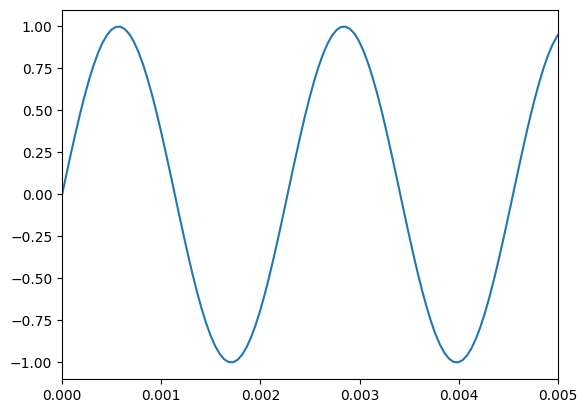

In [5]:
t = numpy.linspace(0, 1, sr)
sinewave = addsyn(440, 1, [1]) # Only one harmonic (the fundamental)
plt.plot(t, sinewave)
plt.xlim(0, 0.005) # Show only 0.005 seconds to see waveform shape
ipd.Audio(sinewave, rate=sr)

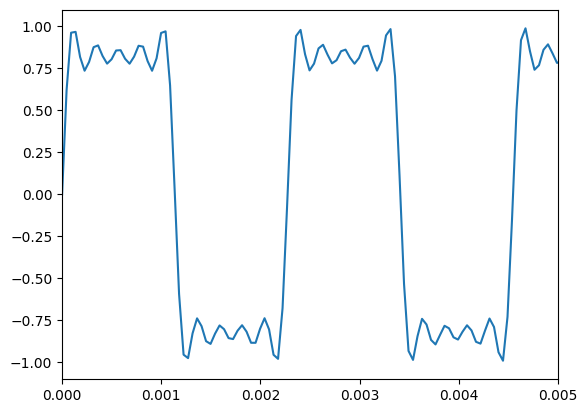

In [6]:
squarewave = addsyn(440, 1, [1, 0, 0.339, 0, 0.204, 0, 0.155, 0, 0.111, 0])
plt.plot(t, squarewave)
plt.xlim(0, 0.005)
ipd.Audio(squarewave, rate=sr)

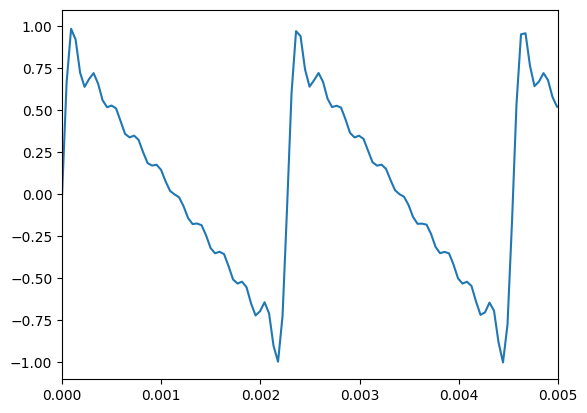

In [7]:
sawtoothwave = addsyn(440, 1, [1, 0.501, 0.339, 0.24, 0.202, 0.168, 0.155, 0.123, 0.111, 0.102])
plt.plot(t, sawtoothwave)
plt.xlim(0, 0.005)
ipd.Audio(sawtoothwave, rate=sr)

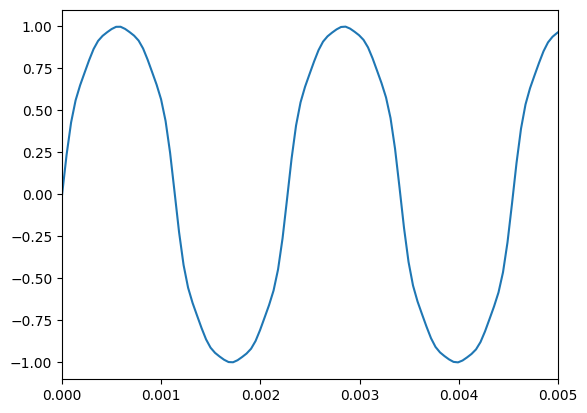

In [8]:
trianglewave = addsyn(440, 1, [1, 0, 0.112, 0, 0.04, 0, 0.022, 0, 0.012, 0])
plt.plot(t, trianglewave)
plt.xlim(0, 0.005)
ipd.Audio(trianglewave, rate=sr)

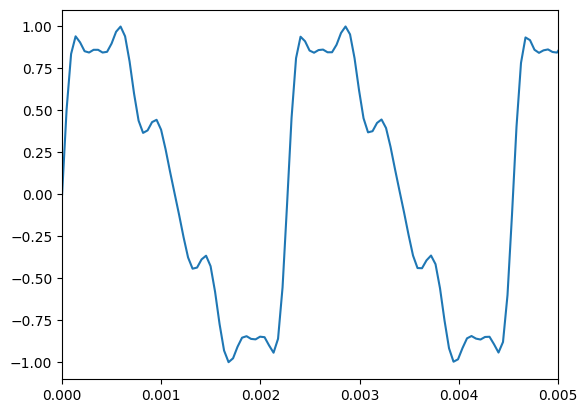

In [9]:
violin = addsyn(440, 1, [1, 0.263, 0.14, 0.099, 0.209, 0.02, 0.029, 0.077, 0.017, 0.01])
plt.plot(t, violin)
plt.xlim(0, 0.005)
ipd.Audio(violin, rate=sr)

In [142]:
def apply_envelope(signal, vel, attack_time, decay_time, sustain_level, release_time, sample_rate):
    A = vel/127
    total_samples = len(signal)
    attack_samples = int(attack_time * sample_rate)
    decay_samples = int(decay_time * sample_rate)
    release_samples = int(release_time * sample_rate)
    
    envelope = numpy.ones(total_samples)
    
    # Attack phase
    envelope[:attack_samples] = numpy.linspace(0, A, attack_samples)
    
    # Decay phase
    envelope[attack_samples:attack_samples+decay_samples] = numpy.linspace(A, sustain_level*A, decay_samples)
    
    # Sustain phase
    envelope[attack_samples+decay_samples:-release_samples] = sustain_level*A
    
    # Release phase
    envelope[-release_samples:] = numpy.linspace(sustain_level*A, 0, release_samples)
    
    # Apply envelope to the signal
    return signal * envelope


In [143]:
def pitch2frec(pitch):
    freq = 2**((pitch-69)/12) * 440 # See https://en.wikipedia.org/wiki/Pitch_(music)#Labeling_pitches
    return freq


def playmelody(notes, durs, harmonics):
    i = 0
    output = numpy.array(())
    for i in range(len(notes)):
        y = addsyn(pitch2frec(notes[i]), durs[i], harmonics)
        output = numpy.concatenate((output, y))
    return output

In [11]:
#TEST

p = [50,46,23,23,34,23]
d = numpy.multiply([.5, .5, 1, 1, .5, .5], 0.25)
h1 = [0.141, 0.200, 0.141, 0.112, 0.079, 0.056, 0.050, 0.035, 0.032, 0.020] # distintos sets armónicos
h2 = [1,0.1,1, 0.263, 0.14,1,0.1 ,0.4,  0.099, 0.209, 0.02, 0.029, 0.077,0.06, 0.017, 0.01]
h3 = [1,0,0.5,0,0.5,0,0.5,0,0.1,0,0.1]
print(d)
x = playmelody(p, d, h3)
ipd.Audio(x, rate=sr)



[0.125 0.125 0.25  0.25  0.125 0.125]


In [26]:
xy = addsyn(pitch2frec(60), 1, [1, 0.263, 0.14, 0.099, 0.209, 0.02, 0.029, 0.077, 0.017, 0.01])
x= apply_envelope(xy, 127, 0.1, 0.1, 0.66, 0.1, sr)
ipd.Audio(x, rate=sr)





In [13]:
#tests de armonicos
d = numpy.multiply([4], 0.25)
h1 = [0.141, 0.200, 0.141, 0.112, 0.079, 0.056, 0.050, 0.035, 0.032, 0.020] # distintos sets armónicos
h2 = [1,0.1,1, 0.263, 0.14,1,0.1 ,0.4,  0.099, 0.209, 0.02, 0.029, 0.077,0.06, 0.017, 0.01]
h3 = [1,0,0.5,0,0.5,0,0.5,0,0.1,0,0.1]
h4 = [1]
for i in range(1, 11):
    h4.append(round(random.random(),2))

print (h4)

x = playmelody([50], d, h4)
ipd.Audio(x, rate=sr)

#[0.73, 0.42, 0.16, 0.66, 0.51, 0.58, 0.33, 0.12, 0.81, 0.95]
#[0.39, 0.1, 0.79, 0.46, 0.59, 0.83, 0.69, 0.6, 0.2, 0.65]

[1, 0.2, 0.04, 0.88, 0.74, 0.32, 0.74, 0.64, 0.97, 0.11, 0.12]


In [144]:
# show plot of algorithm in action?
gShowPlot = False
# generate note of given frequency
def generateNote(freq,vel):
    nSamples = 44100
    sampleRate = 44100
    if freq == 0:
        return numpy.zeros(nSamples)
    else:
        N = int(sampleRate/freq)
    # initialize ring buffer
    buf = deque([random.random() - 0.5 for i in range(N)])
    # plot of flag set 
    if gShowPlot:
        axline, = plt.plot(buf)
    # init sample buffer
    samples = numpy.array([0]*nSamples, 'float32')
    for i in range(nSamples):
        samples[i] = buf[0]
        avg = (0.9+vel/1280)*0.48*(buf[0] + buf[1])
        buf.append(avg)
        buf.popleft()  
        # plot of flag set 
        if gShowPlot:
            if i % 1000 == 0:
                axline.set_ydata(buf)
                plt.draw()
      
    # samples to 16-bit to string
    # max value is 32767 for 16-bit
    samples = numpy.array(samples * 32767, 'int16')
    return samples

82.4068892282175
130.8127826502993
207.65234878997256
293.6647679174076
466.1637615180899
739.9888454232688
1174.6590716696303


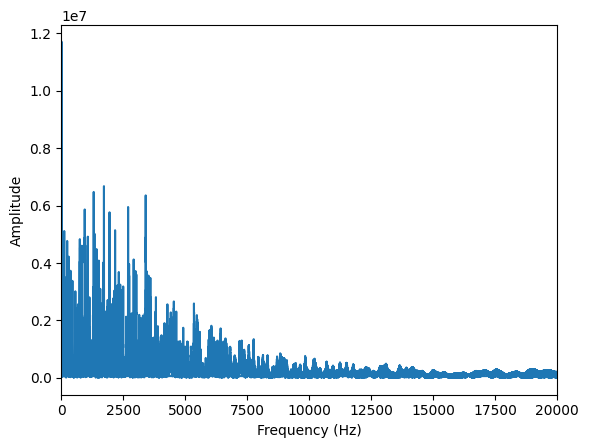

In [ ]:
x = [40,48,56,62,70,78,86]
dur = [0.6,0.6,1,0.6,0.6,0.3,0.6]
data3 = []
prevnote = []
note = []
frec =[]
#calculate the legth of data

sustain = 0.05

for i in range(0,7):
    frec = numpy.append(frec,pitch2frec(int(x[i])))
    note = generateNote(frec[i], 127)
    b, a = signal.butter(4, min(frec[i]*50,sr-1), fs=(sr*2), btype='low', analog=False)
    note = signal.lfilter(b, a, note)
    lastsamples= prevnote[len(prevnote)-int(sustain*len(prevnote)):len(prevnote)]
    prevnote = numpy.concatenate((lastsamples,numpy.zeros(len(prevnote)-len(lastsamples)) ))
    note = numpy.resize(note, int(dur[i]*sr))
    #note = librosa.effects.time_stretch(note,rate= dur[i])
    #note = note + numpy.concatenate((prevnote,numpy.zeros(abs(len(note)-len(prevnote)))))     
    prevnote = note
    data3 = numpy.concatenate((data3, note))
    print(frec[i])
    
# Assuming your ndarray is named 'data'
fft_data = np.fft.fft(data3)

# Compute the frequency values corresponding to the FFT result
freq = np.fft.fftfreq(len(data3)) * 40000

# Plot the frequency spectrum
plt.plot(freq, np.abs(fft_data))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 20000)  # Set the x-axis limit to 20kHz
plt.show()



k=0.4 #constante de panneo

ipd.Audio(data=[(k*data3),((1-k)*data3)], rate=sr)

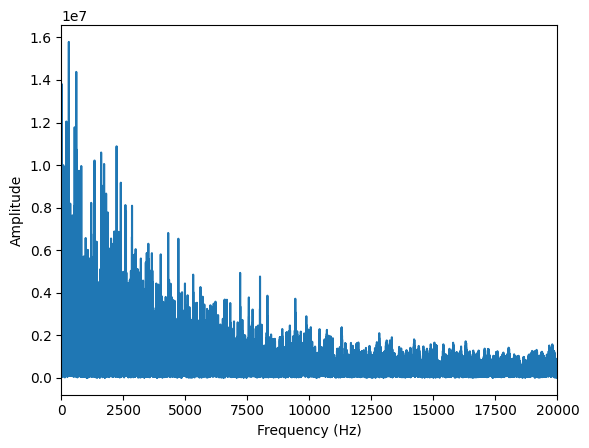

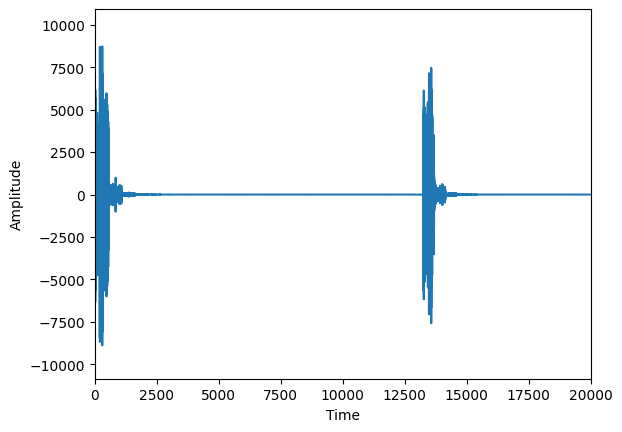

In [435]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming your ndarray is named 'data'
fft_data = np.fft.fft(data3)

# Compute the frequency values corresponding to the FFT result
freq = np.fft.fftfreq(len(data3)) * 40000

# Plot the frequency spectrum
plt.plot(freq, np.abs(fft_data))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 20000)  # Set the x-axis limit to 20kHz
plt.show()




In [146]:
output = addsyn(pitch2frec(69),1,[1,0.1,1, 0.263, 0.14,1,0.1 ,0.4,  0.099, 0.209, 0.02, 0.029, 0.077,0.06, 0.017, 0.01])
output2 = numpy.concatenate((apply_envelope(output,126, 0.1, 0.24, 0.53, 0.13, sr),apply_envelope(output,12, 0.5, 0.3, 0.5, 0.1, sr)))
#ipd.Audio(output, rate=sr)
ipd.Audio(output2, rate=sr)

In [148]:
def ADSR_envelope(signal, vel, attack_time, decay_time, decay_amp, sustain_amp, release_time, sample_rate):
    A = vel/127
    total_samples = len(signal)
    attack_samples = int(attack_time * sample_rate)
    decay_samples = int(decay_time * sample_rate)
    sustain_samples = int((1-attack_time-decay_time-release_time) * sample_rate)
    release_samples = int(release_time * sample_rate)
    
    envelope = numpy.ones(total_samples)
    
    # Attack phase
    envelope[:attack_samples] = numpy.linspace(0, A, attack_samples)
    
    # Decay phase
    envelope[attack_samples:attack_samples+decay_samples] = numpy.linspace(A, decay_amp*A, decay_samples)
    
    # Sustain phase
    envelope[attack_samples+decay_samples:attack_samples+decay_samples+sustain_samples] = numpy.linspace(decay_amp*A, sustain_amp*A,sustain_samples)
    
    # Release phase
    envelope[total_samples-release_samples:] = numpy.linspace(sustain_amp*A, 0, release_samples)
    
    # Apply envelope to the signal
    return signal * envelope


In [169]:
#  ----------------------           ACORDES       ----------------------------

import soundfile 
import librosa

note1 = generateNote(pitch2frec(60),170)
note2 = generateNote(pitch2frec(64),170)
note3 = generateNote(pitch2frec(67),170)
note4 = generateNote(pitch2frec(72),170)

rasgueo = 5000

note1 = numpy.concatenate((note1, numpy.zeros(rasgueo)))
note2 = numpy.concatenate((numpy.zeros(int(rasgueo*0.25)),note2, numpy.zeros(int(rasgueo*0.75))))
note3 = numpy.concatenate((numpy.zeros(int(rasgueo*0.5)),note3, numpy.zeros(int(rasgueo*0.5))))
note4 = numpy.concatenate((numpy.zeros(int(rasgueo*0.75)),note4, numpy.zeros(int(rasgueo*0.25))))

output = note1+note2+note3+note4
output2 = ADSR_envelope(output,126, 0.05, 0.24, 0.74, 0.54, 0.13, 44100)
output2 = output2*0.1

output2 = librosa.effects.time_stretch(output2, rate=1)

# Play the saved WAV file
ipd.Audio(generateNote(pitch2frec(79),170), rate=sr)



In [64]:


# generate note of given frequency
def generateNote2(freq,vel,b,S,gShowPlot=False):
    nSamples = 44100
    sampleRate = 44100
    if freq == 0:
        return numpy.zeros(nSamples)
    else:
        N = int(sampleRate/freq)
    # initialize ring buffer
    buf = deque([random.random() - 0.5 for i in range(N)])
    # plot of flag set 
    if gShowPlot:
        axline, = plt.plot(buf)
    # init sample buffer
    samples = numpy.array([0]*nSamples, 'float32')
    for i in range(nSamples):
        samples[i] = buf[0]
        #ver de cambiar el [0] por [P], su periodo, para cambiar el comportamiento
        #variar el P muestra a muestra hace vibrato, probarlo
        #en lugar de que el avg sea siempre positivo se puede hacer +- con probabilidad b
        #eso cambia el comportamiento, si es 0.5 se produce un tambor
        #con 0 se produce un arpa a frec bajas
        #con 0.5 en b, el P se controla el decay, no la frecuencia
        #para P 200 y SR 20k se tiene u hihat
        #para cambiar el decay (ya que en frecs altas muere rapido) hay que agregar el factor S
        #avg tiene probabilidad 1/S de ser lo de siempre o 1-1/S de ser buf[0]
        #S es prop a P^-1
        probability = random.random()
        avg=0
        if(probability < (b)):
            avg = (0.9+vel/1280)*0.49*(buf[0] + buf[1])
        else:
            avg = -(0.9+vel/1280)*0.49*(buf[0] + buf[1])

        buf.append(avg)
        buf.popleft()  
        # plot of flag set 
        if gShowPlot:
            if i % 1000 == 0:
                axline.set_ydata(buf)
                plt.draw()
      
    # samples to 16-bit to string
    # max value is 32767 for 16-bit
    samples = numpy.array(samples * 32767, 'int16')
    return samples


In [97]:
#  ----------------------           ACORDES       ----------------------------

import soundfile 
import librosa

frec = pitch2frec(60)

note1 = generateNote2(frec,0.5,1,126)
note2 = generateNote2(frec,0.5,numpy.sqrt(frec),126)
note3 = generateNote2(frec,0.5,frec,126)
note4 = generateNote2(frec,0.5,(frec*frec)/2,126)
note5 = generateNote2(frec,0.5,frec*frec,126)

output = numpy.concatenate((note1, note2, note3, note4, note5))

#output2 = ADSR_envelope(note1,126, 0.05, 0.24, 0.74, 0.54, 0.13, 44100)
#output2 = output2*0.1

#b,a = signal.butter(4, 5000, fs=(44100*2), btype='high', analog=False)
#note1 = signal.lfilter(b, a, note1)

#utput2 = librosa.effects.time_stretch(output, rate=1)

# Play the saved WAV file
ipd.Audio(note2, rate=sr)

In [117]:
#KICKDRUM

def sumation(callback, freq):
    phaseY = numpy.cumsum(freq)
    x = numpy.sin((phaseY)*(2*numpy.pi)/sr)
    return x

dur = 0.5
length = int(sr*dur)
lowfreq = 60
highfreq = lowfreq*10+50
t = numpy.maximum(1 - numpy.arange(length)/sr / .05, 0)
freqs = (highfreq-lowfreq)*t**4 + lowfreq
print(freqs)

kick = sumation(numpy.sin, freqs)
b,a = signal.butter(4, lowfreq*10, fs=(44100*2), btype='low', analog=False)
kick = signal.lfilter(b, a, kick)

decay_rate = 5 # Adjust the decay rate as desired

envelope = numpy.exp(-decay_rate * numpy.arange(length) / sr)
kick = kick * envelope * 5

#kick = numpy.where(kick > 1, (kick-1)*(1/kick)+1, numpy.where(kick < -1, (kick+1)*(-1/kick)-1, kick))
print(kick)

kick = numpy.concatenate((kick,kick,kick))

ipd.Audio(kick, rate=sr)

[650.         647.86232104 645.73045625 ...  60.          60.
  60.        ]
[ 1.81763837e-07  1.79015328e-06  8.96406220e-06 ... -3.35977150e-02
 -3.36303892e-02 -3.36532187e-02]


In [156]:
# HIHATs

def randomNoise(length):
    return numpy.random.sample(length)*2-1

length = int(sr*0.5)
noise = randomNoise(length)

t = numpy.arange(length)/sr
env = .5 ** (t*25)

hihat = noise * env

hihat = apply_envelope(hihat, 127, 0.05, 0.1, 0.3, 0.1, sr)
maxAmp = numpy.max(numpy.abs(hihat))
hihat = hihat / maxAmp

print(hihat)
ipd.Audio(hihat, rate=sr)

[-0.00000000e+00  8.28091543e-04  2.73268697e-03 ... -1.09233060e-07
  5.57244905e-08 -0.00000000e+00]


In [159]:
import numpy as np

def karplus_strong(wavetable, n_samples, stretch_factor):
    # stretch_factor = 1    no altera el estiramiento de la nota
    # stretch_factor = inf  genera un tono puro.
    samples = [] 
    # Condiciones Iniciales:
    curr_sample = 0 # Índice para recorrer la tabla de onda
    prev_value = 0  # Valor anterior
    while len(samples) < n_samples: # Recorro hasta que retorno tenga mismo largo
        stretch = np.random.binomial(1, 1-1/stretch_factor)
        if stretch == 0: # Hago el promedio entre la muestra y la anterior
            wavetable[curr_sample] = 0.5 * (wavetable[curr_sample] + prev_value)
        samples.append(wavetable[curr_sample])
        prev_value = samples[-1]    # Tomo el último valor que ingresé a la nueva señal
        curr_sample = (curr_sample+1) % wavetable.size  # Avanzo el índice circularmente
    return np.array(samples)


class GuitarString:
    def __init__(self, pitch, fs, A, T, noise_type, S=1):
        """Initialize Guitar String"""
        self.pitch = pitch                      # Frecuencia de la nota
        self.fs = fs                            # Frecuencia de Sampleo
        self.S = S                              # Stretch Factor
        self.A = A                              # Amplitud
        self.T = T                              # Duración de la nota (samples)
        self.noise_type = noise_type            # Tipo de Ruido Inicial
        self.init_wavetable()
        self.init_samples()
        self.L = None
        
    def init_wavetable(self):
        """Generate new Wavetable for String"""
        self.L = int(np.floor(self.fs / int(self.pitch)-1/2/self.S))
        if self.noise_type == "normal":
            self.wavetable = (self.A * np.random.normal(0, 1, self.L))#.astype(np.float)
        if self.noise_type == "uniform":
            self.wavetable = (self.A * np.random.uniform(-1, 1, self.L))#.astype(np.float)
        if self.noise_type == "2-level":
            self.wavetable = (self.A * 2 * np.random.randint(0, 2, self.L) - 1)#.astype(np.float)

    def init_samples(self):
        """Create sound samples for string"""
        self.samples = karplus_strong(self.wavetable, 2*self.T, self.S)
        
    def get_samples(self):
        """Return Sound Samples"""
        return self.samples

In [170]:
note = GuitarString(390, 44100, 1, 22050, "normal", 1)
note_samples = note.get_samples()
ipd.Audio(note_samples, rate=44100)